In [28]:
# Install KaggleHub with pandas support
!pip install kagglehub[pandas-datasets] --quiet

In [29]:
import pandas as pd

In [30]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

In [31]:
# Set the path to the specific file inside the dataset
file_path = "WA_Fn-UseC_-Telco-Customer-Churn.csv"

# Load the dataset using KaggleHub
df = kagglehub.load_dataset(
    KaggleDatasetAdapter.PANDAS,
    "blastchar/telco-customer-churn",
    file_path
)

# Show first 5 records
df.head()

<ipython-input-31-49fcb7041a69>:5: DeprecationWarning: load_dataset is deprecated and will be removed in future version.
  df = kagglehub.load_dataset(


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [33]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [34]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [35]:
# Get the missing values count and rename the column header
missing_values = df.isnull().sum().reset_index()
missing_values.columns = ['Column Name', 'Missing Value']

# Display the new dataframe with 'Missing Value' as the column header
missing_values


,Column Name,Missing Value
0,customerID,0
1,gender,0
2,SeniorCitizen,0
3,Partner,0
4,Dependents,0
5,tenure,0
6,PhoneService,0
7,MultipleLines,0
8,InternetService,0
9,OnlineSecurity,0


# **🔵 Step 1: Feature Engineering (Encoding Categorical Variables)**

In [37]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [40]:
df['MultipleLines'].unique()

array(['No phone service', 'No', 'Yes'], dtype=object)

In [41]:
# Exclude specific columns and check unique values for the rest
excluded_columns = ['MonthlyCharges', 'TotalCharges', 'customerID']
columns_to_check = df.drop(columns=excluded_columns)

# Loop through the remaining columns and print their unique values
for col in columns_to_check:
    print(f"Unique values in '{col}':", df[col].unique())


Unique values in 'gender': ['Female' 'Male']
Unique values in 'SeniorCitizen': [0 1]
Unique values in 'Partner': ['Yes' 'No']
Unique values in 'Dependents': ['No' 'Yes']
Unique values in 'tenure': [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
Unique values in 'PhoneService': ['No' 'Yes']
Unique values in 'MultipleLines': ['No phone service' 'No' 'Yes']
Unique values in 'InternetService': ['DSL' 'Fiber optic' 'No']
Unique values in 'OnlineSecurity': ['No' 'Yes' 'No internet service']
Unique values in 'OnlineBackup': ['Yes' 'No' 'No internet service']
Unique values in 'DeviceProtection': ['No' 'Yes' 'No internet service']
Unique values in 'TechSupport': ['No' 'Yes' 'No internet service']
Unique values in 'StreamingTV': ['No' 'Yes' 'No internet service']
Unique values in 'StreamingMovies': ['No' 'Yes' 'No internet

In [42]:
# List of binary columns with Yes/No values
binary_cols = ['gender', 'Partner', 'Dependents', 'PhoneService',
               'PaperlessBilling', 'Churn']

# Convert Yes/No to 1/0
for col in binary_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0, 'Female': 0, 'Male': 1})


In [43]:
# List of columns to one-hot encode (more than 2 unique values)
multi_cat_cols = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                  'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                  'Contract', 'PaymentMethod']

# One-hot encode with drop_first=True to avoid dummy variable trap
df = pd.get_dummies(df, columns=multi_cat_cols, drop_first=True)


In [44]:
# Drop customerID since it's unique for each row and not useful for prediction
df.drop('customerID', axis=1, inplace=True)


In [45]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,...,False,False,False,False,False,False,False,False,True,False
1,1,0,0,0,34,1,0,56.95,1889.5,0,...,False,False,False,False,False,True,False,False,False,True
2,1,0,0,0,2,1,1,53.85,108.15,1,...,False,False,False,False,False,False,False,False,False,True
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,True,False,False,False,False,True,False,False,False,False
4,0,0,0,0,2,1,1,70.70,151.65,1,...,False,False,False,False,False,False,False,False,True,False


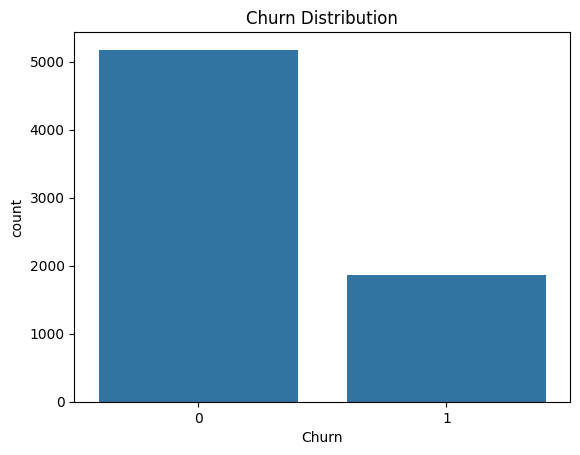

Churn
0    0.73463
1    0.26537
Name: proportion, dtype: float64


In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution')
plt.show()

print(df['Churn'].value_counts(normalize=True))  # Percentage of each class



In [47]:
df.corr(numeric_only=True)['Churn'].sort_values(ascending=False)


,Churn
Churn,1.000000
InternetService_Fiber optic,0.308020
PaymentMethod_Electronic check,0.301919
MonthlyCharges,0.193356
PaperlessBilling,0.191825
SeniorCitizen,0.150889
StreamingTV_Yes,0.063228
StreamingMovies_Yes,0.061382
MultipleLines_Yes,0.040102
PhoneService,0.011942


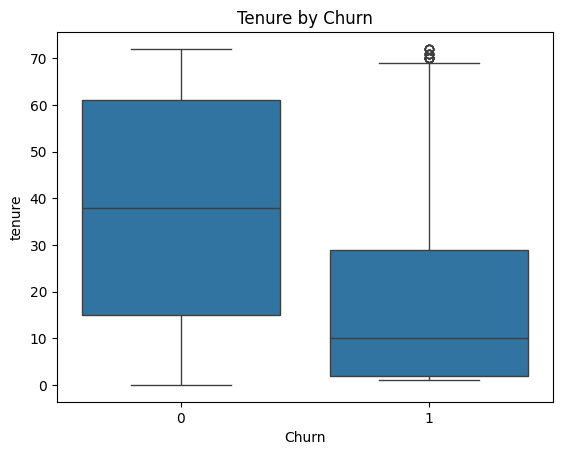

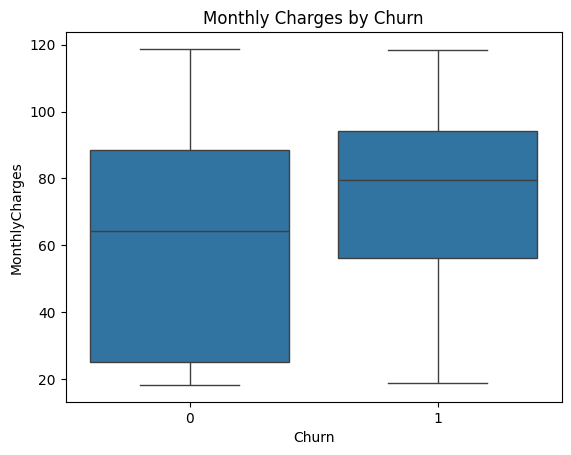

In [48]:
# Tenure vs Churn
sns.boxplot(x='Churn', y='tenure', data=df)
plt.title('Tenure by Churn')
plt.show()

# MonthlyCharges vs Churn
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('Monthly Charges by Churn')
plt.show()


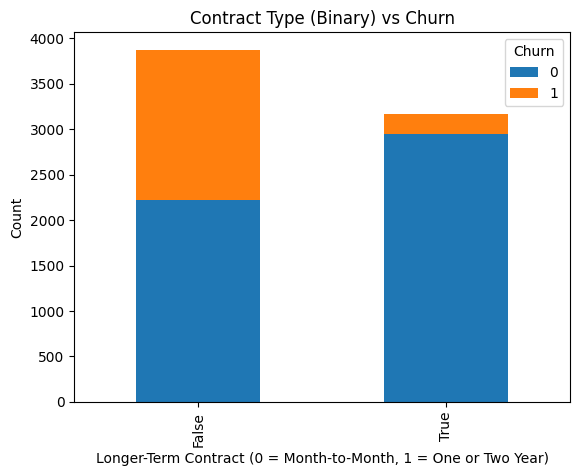

In [49]:
# For example: Contract type vs Churn
contract_churn = pd.crosstab(df['Contract_One year'] + df['Contract_Two year'], df['Churn'])
contract_churn.plot(kind='bar', stacked=True)
plt.title('Contract Type (Binary) vs Churn')
plt.xlabel('Longer-Term Contract (0 = Month-to-Month, 1 = One or Two Year)')
plt.ylabel('Count')
plt.show()


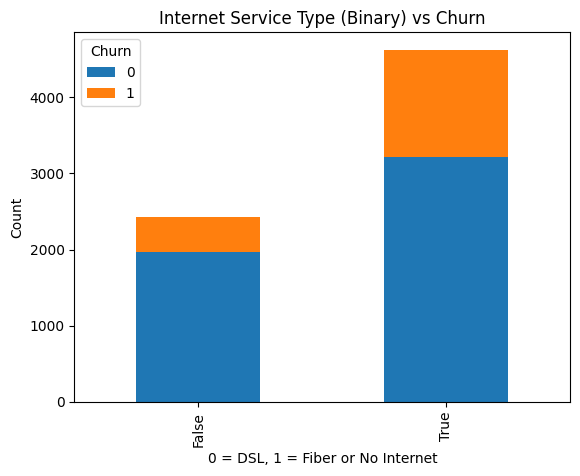

In [50]:
internet_churn = pd.crosstab(df['InternetService_Fiber optic'] + df['InternetService_No'], df['Churn'])
internet_churn.plot(kind='bar', stacked=True)
plt.title('Internet Service Type (Binary) vs Churn')
plt.xlabel('0 = DSL, 1 = Fiber or No Internet')
plt.ylabel('Count')
plt.show()


In [53]:
payment_churn = pd.crosstab(df['PaymentMethod'], df['Churn'])
payment_churn.plot(kind='bar', stacked=True)
plt.title('Payment Method vs Churn')
plt.ylabel('Count')
plt.show()

KeyError: 'PaymentMethod'

In [54]:
# Check the column names in the DataFrame
print(df.columns)



Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'Churn', 'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')


In [55]:
# List all columns related to 'PaymentMethod' after one-hot encoding
payment_method_columns = [col for col in df.columns if 'PaymentMethod' in col]
print(payment_method_columns)


['PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']


In [56]:
# List of one-hot encoded PaymentMethod columns
payment_method_columns = ['PaymentMethod_Credit card (automatic)',
                          'PaymentMethod_Electronic check',
                          'PaymentMethod_Mailed check']

# Analyze the relationship between payment method and churn
payment_churn = pd.crosstab(df[payment_method_columns], df['Churn'])
payment_churn.plot(kind='bar', stacked=True)
plt.title('Payment Method vs Churn')
plt.ylabel('Count')
plt.show()


ValueError: Data must be 1-dimensional, got ndarray of shape (7043, 3) instead